# QUESTÃO 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import graphs
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from model_selection import forward_selected, backward_selected

In [2]:
df = pd.read_csv('ny_restaurants.csv', sep =' ')
df['Location'] = df['Location'].map({'West':1,'East':-1})
df

,Restaurant,Price,Food,Decor,Service,Location
1,Daniella Ristorante,43,22,18,20,1
2,Tello's Ristorante,32,20,19,19,1
3,Biricchino,34,21,13,18,1
4,Bottino,41,20,20,17,1
5,Da Umberto,54,24,19,21,1
...,...,...,...,...,...,...
164,Baci,31,17,15,16,1
165,Puccini,26,20,16,17,1
166,Bella Luna,31,18,16,17,1
167,Métisse,38,22,17,21,1


In [3]:
df.sample(10)

,Restaurant,Price,Food,Decor,Service,Location
131,Torre di Pisa,47,19,21,17,1
23,Osteria Laguna,38,20,18,18,-1
98,Quattro Gatti,41,19,17,19,-1
156,Patsy's,42,20,16,19,1
26,Anche Vivolo,37,19,17,19,-1
137,Limoncello,46,19,18,20,1
164,Baci,31,17,15,16,1
162,"La Grolla, Ristorante",42,21,15,19,1
90,Luca,37,21,15,18,-1
136,Ciao Europa,40,19,19,18,1


In [4]:
df.describe()

,Price,Food,Decor,Service,Location
count,168.000000,168.000000,168.000000,168.00000,168.000000
mean,42.696429,20.595238,17.690476,19.39881,-0.261905
std,9.292814,1.982674,2.702743,2.11394,0.967979
min,19.000000,16.000000,6.000000,14.00000,-1.000000
25%,36.000000,19.000000,16.000000,18.00000,-1.000000
50%,43.000000,20.500000,18.000000,20.00000,-1.000000
75%,50.000000,22.000000,19.000000,21.00000,1.000000
max,65.000000,25.000000,25.000000,24.00000,1.000000


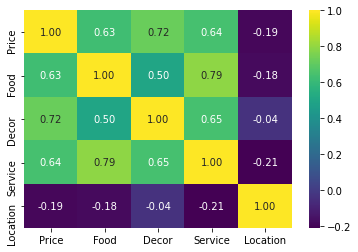

In [5]:
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

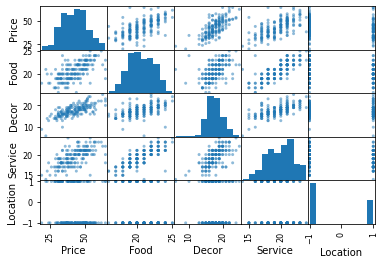

In [6]:
pd.plotting.scatter_matrix(df);

In [7]:
X = sm.add_constant(df.drop(['Price','Restaurant'], axis=1))
y = df['Price']
X.head()

,const,Food,Decor,Service,Location
1,1.0,22,18,20,1
2,1.0,20,19,19,1
3,1.0,21,13,18,1
4,1.0,20,20,17,1
5,1.0,24,19,21,1


In [8]:
X.sample(10)

,const,Food,Decor,Service,Location
163,1.0,19,16,18,1
154,1.0,20,18,18,1
84,1.0,20,16,19,-1
34,1.0,23,22,23,-1
62,1.0,19,16,17,-1
4,1.0,20,20,17,1
22,1.0,23,17,21,-1
50,1.0,16,16,16,-1
103,1.0,23,16,20,-1
105,1.0,24,21,21,-1


In [9]:
model = sm.OLS(y, X.astype(float)).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.35e-34
Time:                        15:28:44   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.9898      4.760     -4.830      0.000     -32.390     -13.590
Food           1.5381      0.369      4.169      0.000       0.810       2.267
Decor          1.9101      0.217      8.802      0.000       1.482       2.339
Service       -0.0027      0.396     -0.007      0.995      -0.785       0.780
Location      -1.0340      0.473     -2.184      0.030      -1.969      -0.099
==============================================================================
Omnibus:                        5.180   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.039
Skew:                           0.304   Prob(JB):                       0.0805
Kurtosis:                       3.591   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
graph_plotter = graphs.AssumptionGraphs(model)

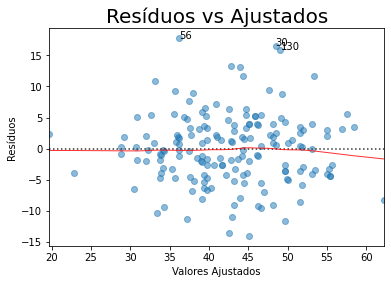

In [12]:
graph_plotter.plot_residual_fitted_values(y)

Somente no final temos uma tendência de diminuir os resíduos.

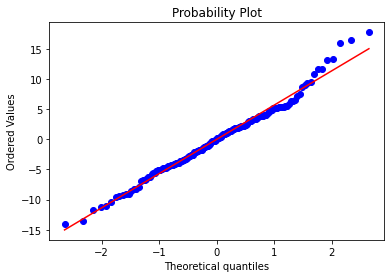

In [13]:
graph_plotter.plot_qq()

Os pontos seguem aproximadamente a linha e somente no final saem, ou seja, os resíduos não possuem um padrão de normalidade para todos os dados.

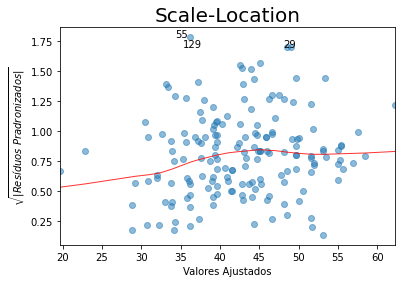

In [14]:
graph_plotter.plot_scale_location()

A variância tende a aumentar, ferindo a premissa de homocedasticidade.

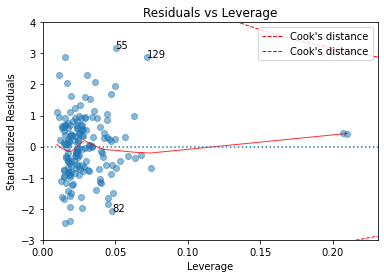

In [15]:
graph_plotter.plot_influence();

Não possuímos outliers. Os pontos próximos da curva vermelha são os pontos que mais influenciam nosso ajuste do modelo e os pontos na vertical são os resíduos.

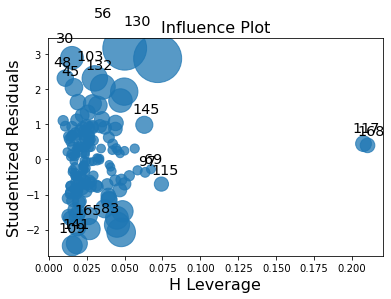

In [16]:
model.get_influence().plot_influence();

In [17]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const       115.629135
Food          2.714261
Decor         1.744851
Service       3.558735
Location      1.064985
dtype: float64

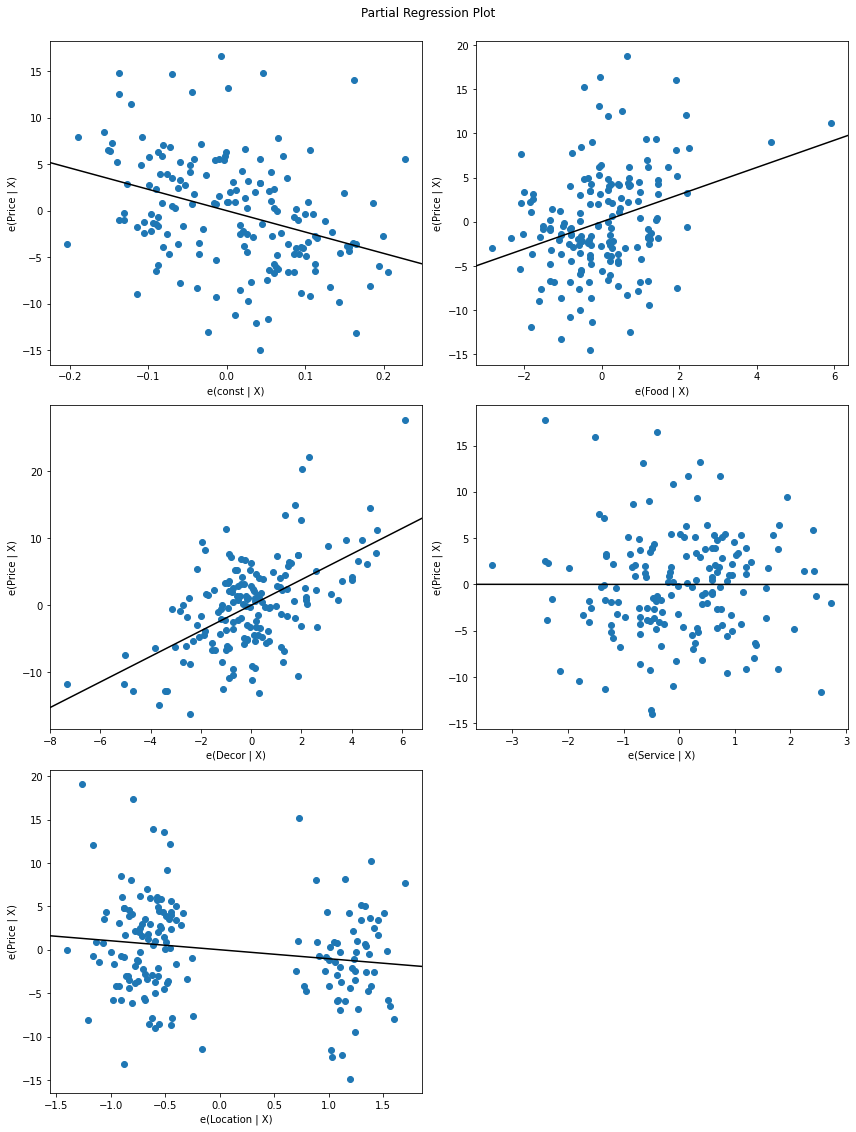

In [18]:
fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(model, fig=fig);

A variável `Service` tem um alto fator de inflação de variância, um p-valor insignificante no modelo como um todo e não tem um padrão distinto nos gráficos de regressão parcial. Vamos analisar o modelo após a remoção dessa variável.

In [19]:
X = sm.add_constant(df.drop(['Price','Restaurant','Service'], axis=1))
y = df['Price']
X.head()

,const,Food,Decor,Location
1,1.0,22,18,1
2,1.0,20,19,1
3,1.0,21,13,1
4,1.0,20,20,1
5,1.0,24,19,1


In [20]:
X.sample(10)

,const,Food,Decor,Location
41,1.0,19,17,-1
135,1.0,20,19,1
23,1.0,20,18,-1
125,1.0,20,17,1
84,1.0,20,16,-1
55,1.0,18,15,-1
8,1.0,20,18,-1
17,1.0,22,18,-1
147,1.0,19,20,1
72,1.0,23,20,-1


In [21]:
model2 = sm.OLS(y, X).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.10e-35
Time:                        15:28:46   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.9934      4.717     -4.875      0.000     -32.307     -13.679
Food           1.5363      0.263      5.838      0.000       1.017       2.056
Decor          1.9094      0.190     10.049      0.000       1.534       2.285
Location      -1.0335      0.466     -2.218      0.028      -1.953      -0.114
==============================================================================
Omnibus:                        5.191   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.053
Skew:                           0.305   Prob(JB):                       0.0799
Kurtosis:                       3.592   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O $R^2$ ajustado aumentou e o modelo continua significativo

In [23]:
graph_plotter = graphs.AssumptionGraphs(model2)

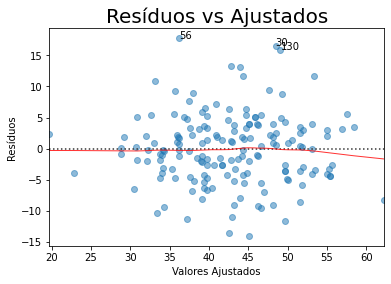

In [24]:
graph_plotter.plot_residual_fitted_values(y)

Somente no final temos uma tendência de diminuir os resíduos.

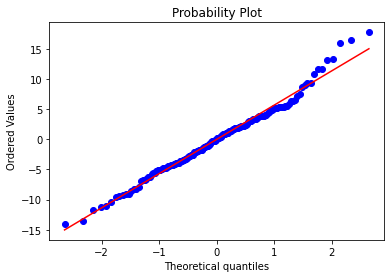

In [25]:
graph_plotter.plot_qq()

Os pontos seguem aproximadamente a linha e somente no final saem, ou seja, os resíduos não possuem um padrão de normalidade para todos os dados.

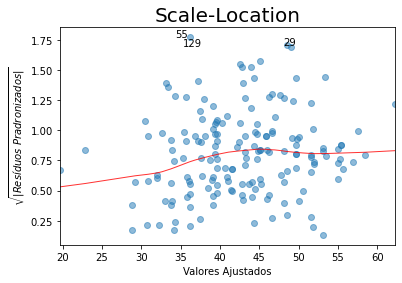

In [26]:
graph_plotter.plot_scale_location()

A variância tende a aumentar, ferindo a premissa de homocedasticidade.

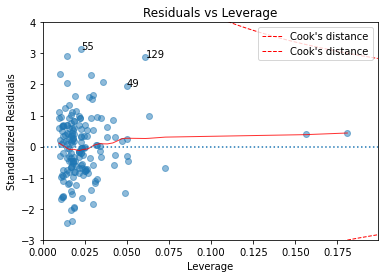

In [27]:
graph_plotter.plot_influence()

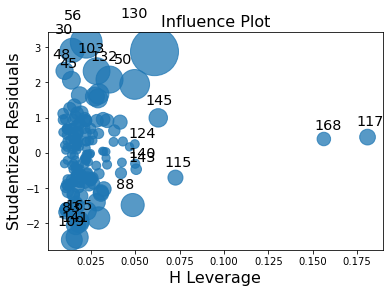

In [28]:
model2.get_influence().plot_influence();

Não possuímos outliers. Os pontos próximos da curva vermelha são os pontos que mais influenciam nosso ajuste do modelo e os pontos na vertical são os resíduos.

A influência de alguns pontos diminuíram, comparando com o primeiro gráfico.

In [29]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const       114.234485
Food          1.389515
Decor         1.346030
Location      1.038000
dtype: float64

Todos os fatores diminuíram.

In [30]:
anova_results = anova_lm(model2, model)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,164.0,5366.523275,0.0,NaN,NaN,NaN
1,163.0,5366.521715,1.0,0.00156,0.000047,0.994516


O p-valor é bem alto, indicando que devemos ficar com a hipótese nula. Concluímos que a variável Service não é informativa para o modelo.

Sugerindo outro modelo para testarmos. Nesse modelo, retiramos `Location`

In [31]:
X = sm.add_constant(df.drop(['Price','Restaurant','Location'], axis=1))
y = df['Price']
X.head()

,const,Food,Decor,Service
1,1.0,22,18,20
2,1.0,20,19,19
3,1.0,21,13,18
4,1.0,20,20,17
5,1.0,24,19,21


In [32]:
model3 = sm.OLS(y, X).fit()

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.39e-34
Time:                        15:28:48   Log-Likelihood:                -531.78
No. Observations:                 168   AIC:                             1072.
Df Residuals:                     164   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.6409      4.754     -5.184      0.000     -34.027     -15.255
Food           1.5556      0.373      4.170      0.000       0.819       2.292
Decor          1.8473      0.218      8.491      0.000       1.418       2.277
Service        0.1350      0.396      0.341      0.733      -0.646       0.916
==============================================================================
Omnibus:                        6.513   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.939
Skew:                           0.327   Prob(JB):                       0.0311
Kurtosis:                       3.750   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O $R^2$ ajustado diminui e o modelo parece não ser significativo.

In [34]:
graph_plotter = graphs.AssumptionGraphs(model3)

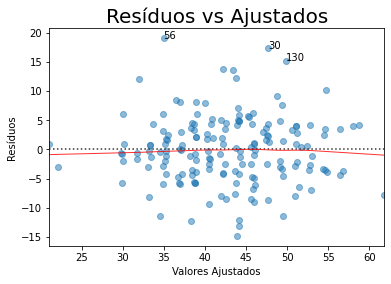

In [35]:
graph_plotter.plot_residual_fitted_values(y)

Temos um leve crescimento dos resíduos e no final uma tendência de queda dos resíduos.

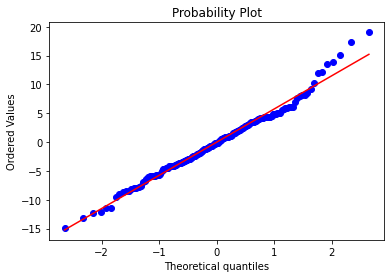

In [36]:
graph_plotter.plot_qq()

Os pontos seguem aproximadamente a linha e somente no final saem, ou seja, os resíduos não possuem um padrão de normalidade para todos os dados.

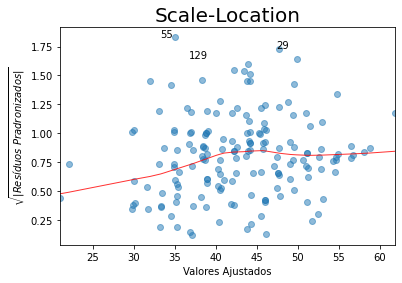

In [37]:
graph_plotter.plot_scale_location()

A variância tende a aumentar, ferindo a premissa de homocedasticidade.

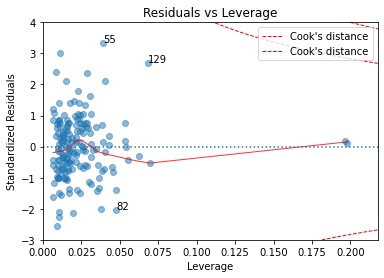

In [38]:
graph_plotter.plot_influence()

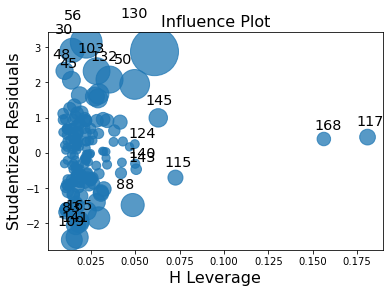

In [39]:
model2.get_influence().plot_influence();

Não possuímos outliers. Os pontos próximos da curva vermelha são os pontos que mais influenciam nosso ajuste do modelo e os pontos na vertical são os resíduos.
A influência de alguns pontos diminuíram comparando com o primeiro gráfico.

In [40]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const      112.713722
Food         2.712989
Decor        1.714273
Service      3.468564
dtype: float64

Todos os fatores aumentaram (excluindo const, claro).

In [41]:
anova_results = anova_lm(model3, model)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,164.0,5523.618415,0.0,NaN,NaN,NaN
1,163.0,5366.521715,1.0,157.0967,4.771575,0.030362


O p-valor é baixo, indicando que devemos ficar com a hipótese alternativa. Concluímos que este modelo não é bom e não devemos ignorar a influência da variável `Location`.

Vamos usar o teste F parcial para testar múltiplas variáveis preditoras de uma vez.

In [42]:
X = sm.add_constant(df.drop(['Price','Restaurant'], axis=1))
y = df['Price']
model_full = sm.OLS(y, X).fit()

In [43]:
df.columns

Index(['Restaurant', 'Price', 'Food', 'Decor', 'Service', 'Location'], dtype='object')

In [44]:
X = sm.add_constant(df.drop(['Price', 'Restaurant', 'Location'], axis=1))
y = df['Price']
model_reduced = sm.OLS(y, X).fit()

In [45]:
anova_results = anova_lm(model_reduced, model_full)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,164.0,5523.618415,0.0,NaN,NaN,NaN
1,163.0,5366.521715,1.0,157.0967,4.771575,0.030362


O p-valor é pequeno, então o modelo reduzido não é suficiente.

In [46]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.39e-34
Time:                        15:28:49   Log-Likelihood:                -531.78
No. Observations:                 168   AIC:                             1072.
Df Residuals:                     164   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.6409      4.754     -5.184      0.000     -34.027     -15.255
Food           1.5556      0.373      4.170      0.000       0.819       2.292
Decor          1.8473      0.218      8.491      0.000       1.418       2.277
Service        0.1350      0.396      0.341      0.733      -0.646       0.916
==============================================================================
Omnibus:                        6.513   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.939
Skew:                           0.327   Prob(JB):                       0.0311
Kurtosis:                       3.750   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
graph_plotter = graphs.AssumptionGraphs(model_reduced)

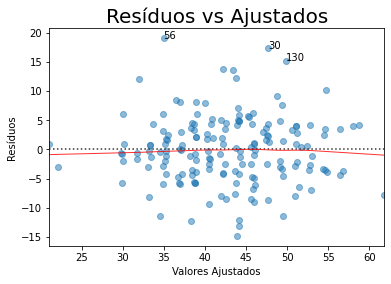

In [48]:
graph_plotter.plot_residual_fitted_values(y)

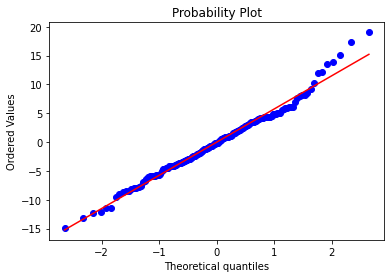

In [49]:
graph_plotter.plot_qq()

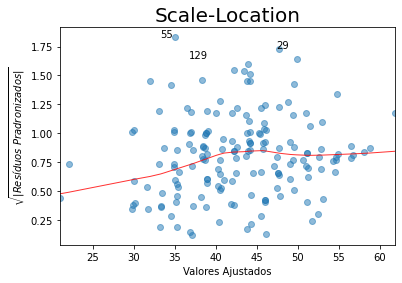

In [50]:
graph_plotter.plot_scale_location()

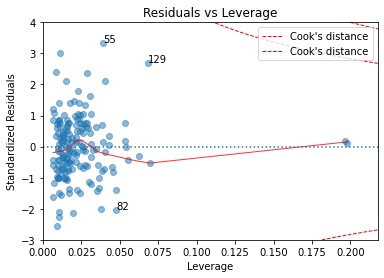

In [51]:
graph_plotter.plot_influence()

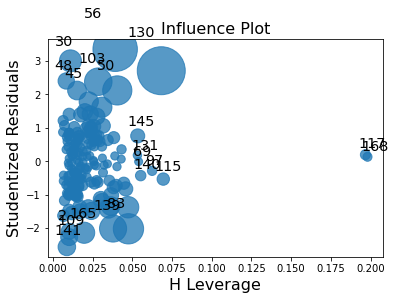

In [52]:
model_reduced.get_influence().plot_influence();

In [53]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const      112.713722
Food         2.712989
Decor        1.714273
Service      3.468564
dtype: float64

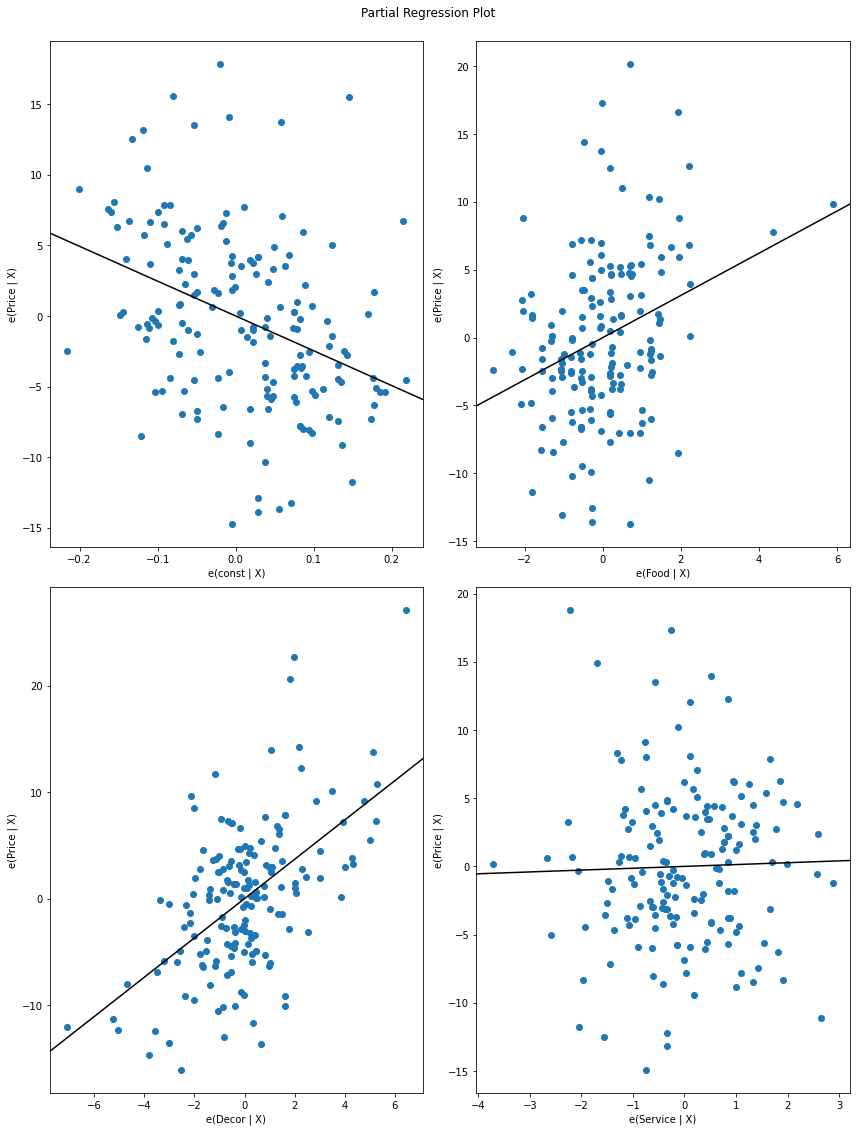

In [54]:
fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(model_reduced, fig=fig);

In [55]:
pd.DataFrame({'Model': ['Full', 'Without Service', 'Reduced'], 'AIC': [model_full.aic, model2.aic, model_reduced.aic],
              'BIC': [model_full.bic, model2.bic, model_reduced.bic]})

,Model,AIC,BIC
0,Full,1068.710521,1084.330341
1,Without Service,1066.710570,1079.206426
2,Reduced,1071.557856,1084.053712


Pelo AIC e pelo BIC, o modelo "Without Service" é o melhor, pois possui menores valores. O modelo escolhido é melhor para predição (pelo AIC) e também para descrição (pelo BIC).

In [56]:
df.columns

Index(['Restaurant', 'Price', 'Food', 'Decor', 'Service', 'Location'], dtype='object')

In [57]:
np.seterr(divide='ignore', invalid='ignore')
best_model_forward = forward_selected(df, 'Price')

Adding Decor	score: 0.5218231829126965
Adding Food	score: 0.6120697668072232
Adding Location	score: 0.6210737705927636


In [58]:
best_model_backward = backward_selected(df, 'Price')

In [59]:
best_model_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Sun, 05 Jul 2020   Prob (F-statistic):           5.10e-35
Time:                        15:28:52   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.9934      4.717     -4.875      0.000     -32.307     -13.679
Decor          1.9094      0.190     10.049      0.000       1.534       2.285
Food           1.5363      0.263      5.838      0.000       1.017       2.056
Location      -1.0335      0.466     -2.218      0.028      -1.953      -0.114
==============================================================================
Omnibus:                        5.191   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.053
Skew:                           0.305   Prob(JB):                       0.0799
Kurtosis:                       3.592   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
graph_plotter = graphs.AssumptionGraphs(best_model_forward)

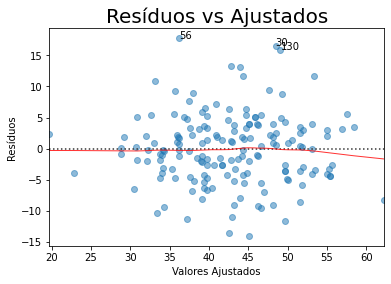

In [61]:
graph_plotter.plot_residual_fitted_values(y)

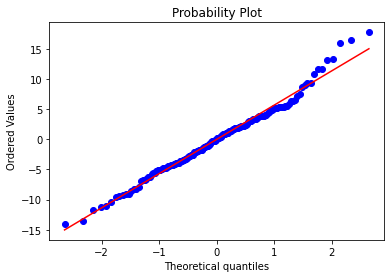

In [62]:
graph_plotter.plot_qq()

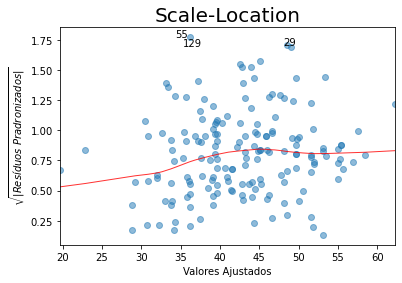

In [63]:
graph_plotter.plot_scale_location()

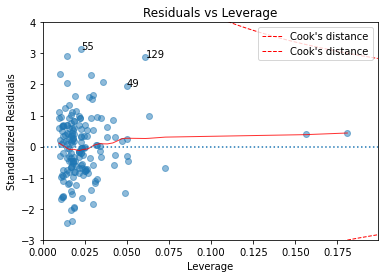

In [64]:
graph_plotter.plot_influence()

In [65]:
X = sm.add_constant(df[['Decor', 'Food']])
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const    111.865658
Decor      1.340359
Food       1.340359
dtype: float64

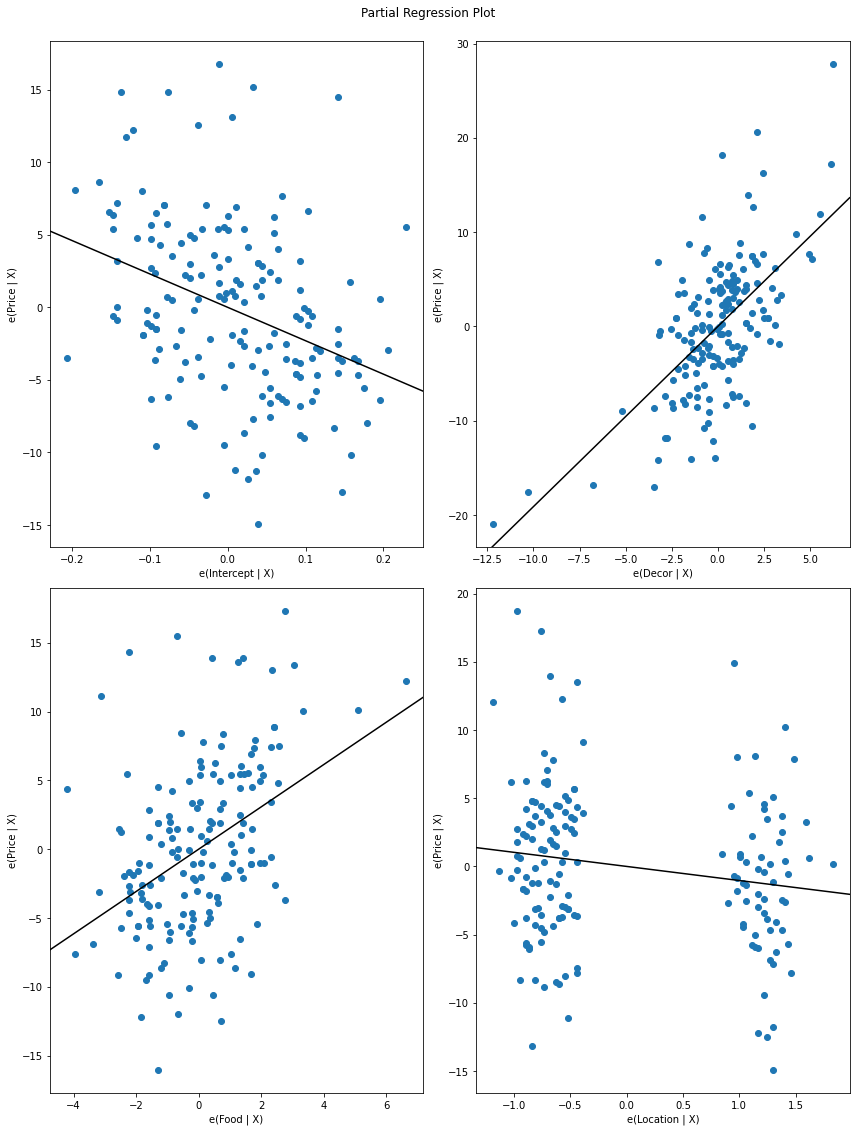

In [66]:
fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(best_model_forward, fig=fig);

Concluindo, o melhor modelo é, de fato, o modelo "Without Service", que foi comparado pelas métricas AIC, BIC, fator de inflação de variância, $R^2$ e p-valor, além dos gráficos de controle.